# 1. 베르누이 시행

- 결과가 둘로 나누어지는 시행

- 그 중 (성공 - 1, 실패 - 0) 대응시키는 확률 변수 : 베르누이 확률 변수

- ex) 동전을 던져 앞이 나올 확률 

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
# 사이파이의 stats 서브 패키지에 있는 bernoulli 클래스는 베르누이 확률변수를 구현함.

import scipy as sp
import scipy.stats
p = 0.6
rv = sp.stats.bernoulli(p)

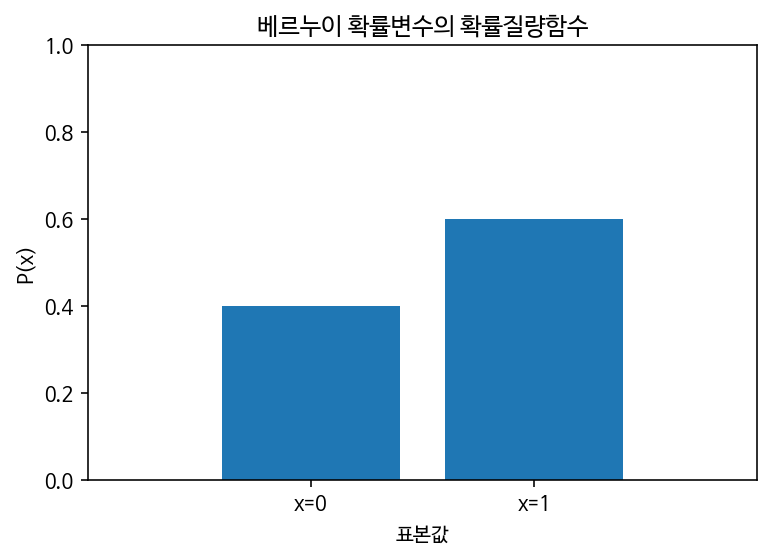

In [0]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [0]:
# rvs() 메서드를 사용하여 표본값을 무작위 생성.

x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

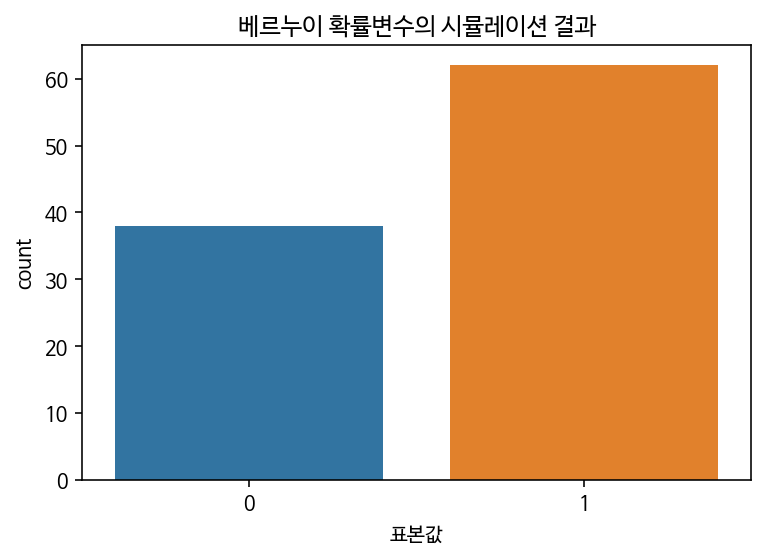

In [0]:
import seaborn as sns

sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [0]:
import numpy as np
import pandas as pd

y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [0]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


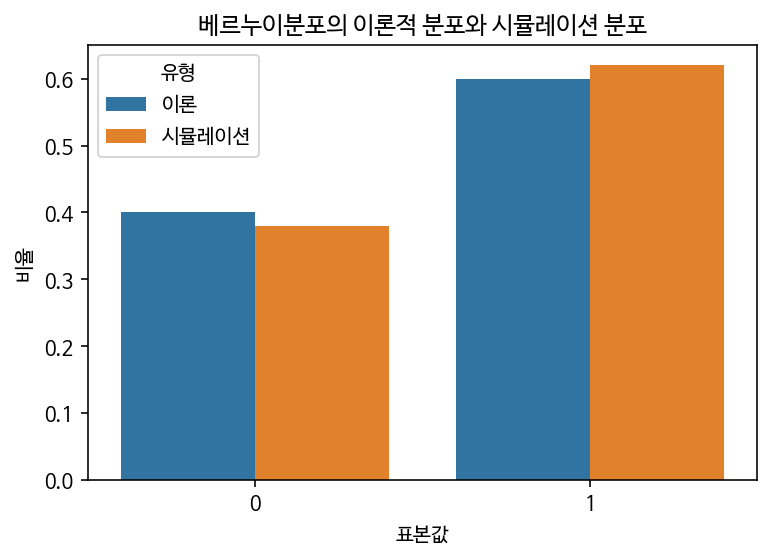

In [0]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

# 2. 이항 분포

- 연속된 n번의 독립적 시행에서 각 시행이 확률 'p'를 가질 때의 이산 확률 분포

- 'n=1' 인 경우, 베르누이 분포이다.

- '성공확률이 일정한 베르누이 시행'을 독립적으로 반복할때, 일어나는 '성공의 횟수'를 나타낸다.

**X = X(1) + X(2) + .... + X(n)**

- X : n번 전화했을때 받은 횟수(이항 확률 변수)

- X(2) : 2번'째' 전화했을때의 여부(베르누이 확률 변수)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving go_1.PNG to go_1 (2).PNG


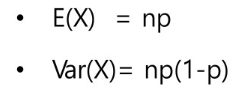

In [0]:
from IPython.display import Image
Image('go_1.PNG')

In [0]:
# 이항분포 확률변수는 사이파이의 stats 서브패키지의 binom 클래스로 구현.
N = 10
p = 0.6
rv = sp.stats.binom(N, 0.6)

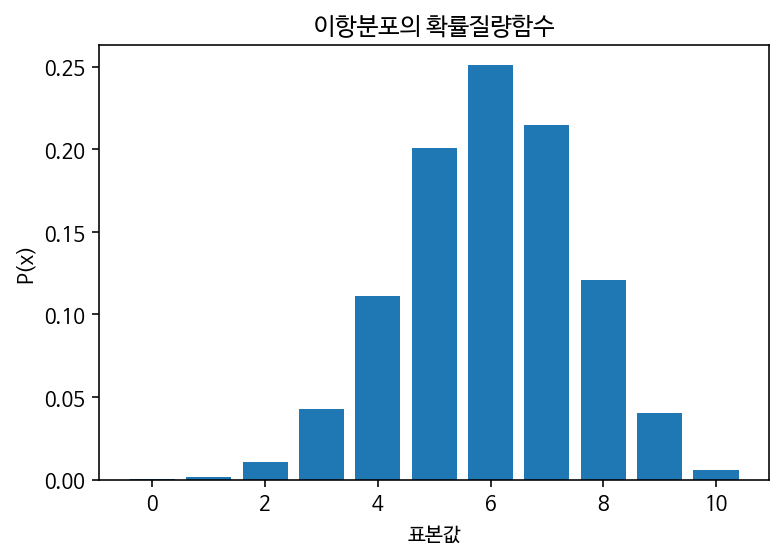

In [0]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("이항분포의 확률질량함수")
plt.show()

# 3. 제곱근의 법칙.

- 시행횟수가 'n배' 증가할수록 확률오차(불확실성)의 절대적 크기는 '√n배' 증가한다. 

- 그러나, 시행횟수가 증가할수록 불확실성의 상대적 크기는 감소한다.

- ex) 동전을 한번 던졌을 때의 표준오차 = 0.5
- 동전을 100회 던졌을 경우의 표준오차(불확실성) = 0.5 * 10 = 5

# 4. 대수(평균)의 법칙

- 'N' 과 'R'의 차이(1.3_2p~6p)

- 시행횟수의 증가(R의 증가)로 인해 경험적 히스토그램과 확률 히스토그램은 '근사'된다.

- 관측치수(n)이 증가함에 따라 합 or 평균의 히스토그램은 정규분포곡선으로 수렴해간다.
(중심극한정리)



## 5. 부트스트래핑

- 표본크기가 크지 않고 어떠한 이론의 도움 없이 ,표본의 합 or 평균의 확률 히스토그램을 주어진 자료만을 가지고 근사시키는 방법.

- 금융시장의 예시